In [11]:
import seaborn as sns
import json
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load results
ROOT_PATH="../outputs/cifar10-all/f{f}_{atk}_{agg}_m{m}_seed{s}/stats"

def read_json(path):
    print("read_json", path)
    validation = []
    with open(path, "r") as f:
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'validation':
                validation.append(data)
    return validation

# Loop over hyperparameters
data_collection = {}
for seed in [0, 1]: 
    for attack in [ "BF", "LF", "IPM", "ALIE"]:
        for agg in ["cm", "rfa", "tm", "krum", "cp"]:
            for m in [0.0, 0.9, 0.99]:
                if attack == "IPM":
                    f = 11
                else:
                    f = 5
                try:
                    path = ROOT_PATH.format(atk=attack, agg=agg, m=m, s=seed, f=f)
                    data_collection[path] = read_json(path)
                except Exception as e:
                    print(e)
                    raise 

def transform(entry, atk, agg, m, s):
    # {'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887, 'top1': 17.8986}
    return {
        'Epochs': entry['E'],
        'Accuracy (%)': entry['top1'],
        'ATK': atk,
        'AGG': agg.upper() if agg != "cp" else "CC",
        r"$\beta$": m,
        'seed': s,
        r"$\delta=0$": False,
    }

df = []
for seed in [0, 1]: 
    for attack in ["IPM", "ALIE", "BF", "LF"]:
        for agg in ["cm", "rfa", "tm", "krum", "cp"]:
            for m in [0.0, 0.9, 0.99]:
                if attack == "IPM":
                    f = 11
                else:
                    f = 5
                try:
                    path = ROOT_PATH.format(f=f, atk=attack, agg=agg, m=m, s=seed)
                    validation_entries = data_collection[path]
                    df += list(map(lambda x: transform(x, atk=attack, agg=agg, m=m, s=seed), validation_entries))
                except Exception as e:
                    print("Error", e)
                    raise

df = pd.DataFrame(df)

read_json ../outputs/cifar10-all/f5_BF_cm_m0.0_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_cm_m0.9_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_cm_m0.99_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_rfa_m0.0_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_rfa_m0.9_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_rfa_m0.99_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_tm_m0.0_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_tm_m0.9_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_tm_m0.99_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_krum_m0.0_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_krum_m0.9_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_krum_m0.99_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_cp_m0.0_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_cp_m0.9_seed0/stats
read_json ../outputs/cifar10-all/f5_BF_cp_m0.99_seed0/stats
read_json ../outputs/cifar10-all/f5_LF_cm_m0.0_seed0/stats
read_json ../outputs/cifar10-all/f5_LF_cm_

In [1]:
import seaborn as sns
import json
import pandas as pd
import numpy as np

# Load results
ROOT_PATH="../outputs/cifar10-all-noattack/NA_avg_m{m}_seed{s}/stats"

def read_json(path):
    print("read_json", path)
    validation = []
    with open(path, "r") as f:
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'validation':
                validation.append(data)
    return validation

# Loop over hyperparameters
data_collection = {}
for seed in [0, 1]: 
    for m in [0.0, 0.9, 0.99]:
        try:
            path = ROOT_PATH.format(m=m, s=seed)
            data_collection[path] = read_json(path)
        except Exception as e:
            print(e)
            raise 

def transform(entry, atk, agg, m, s):
    # {'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887, 'top1': 17.8986}
    return {
        'Epochs': entry['E'],
        'Accuracy (%)': entry['top1'],
        'ATK': atk,
        'AGG': "AVG",
        r"$\beta$": m,
        'seed': s,
        r"$\delta=0$": True,
    }

df_avg = []
for seed in [0, 1]: 
    for attack in ["IPM", "ALIE", "BF", "LF"]:
        for agg in ["cm", "rfa", "tm", "krum", "cp"]:
            for m in [0.0, 0.9, 0.99]:
                try:
                    path = ROOT_PATH.format(m=m, s=seed)
                    validation_entries = data_collection[path]
                    df_avg += list(map(lambda x: transform(x, atk=attack, agg=agg, m=m, s=seed), validation_entries))
                except Exception as e:
                    print("Error", e)
                    raise

df_avg = pd.DataFrame(df_avg)

read_json ../outputs/cifar10-all-noattack/NA_avg_m0.0_seed0/stats
[Errno 2] No such file or directory: '../outputs/cifar10-all-noattack/NA_avg_m0.0_seed0/stats'


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/cifar10-all-noattack/NA_avg_m0.0_seed0/stats'

In [2]:
df_avg

NameError: name 'df_avg' is not defined

In [14]:
pd.concat([df_avg, df])

,Epochs,Accuracy (%),ATK,AGG,$\beta$,seed,$\delta=0$
0,1,31.550481,IPM,AVG,0.00,0,True
1,2,43.419471,IPM,AVG,0.00,0,True
2,3,46.444311,IPM,AVG,0.00,0,True
3,4,47.005208,IPM,AVG,0.00,0,True
4,5,51.832933,IPM,AVG,0.00,0,True
...,...,...,...,...,...,...,...
11995,96,89.032452,LF,CC,0.99,1,False
11996,97,89.403045,LF,CC,0.99,1,False
11997,98,89.312901,LF,CC,0.99,1,False
11998,99,89.453125,LF,CC,0.99,1,False


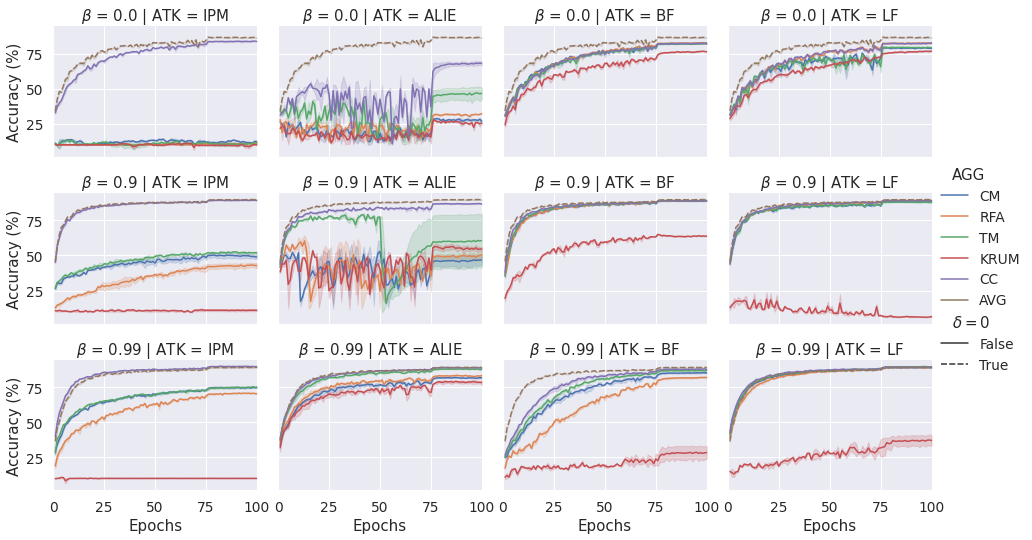

In [15]:
sns.set(font_scale=1.25)
g = sns.relplot(
    data=pd.concat([df, df_avg]),
    x="Epochs", y="Accuracy (%)", 
    col="ATK", row=r"$\beta$", 
    hue="AGG", style=r"$\delta=0$",
    height=2.5, aspect=1.3,
    # legend=False,
    # ci=None,
    kind="line"
)
g.set(xlim=(0, 100))


In [16]:
g.fig.savefig("/home/lhe/Projects/2020-2021/momentum-robustness/report/figures/exp3_transpose.pdf", bbox_inches = "tight")

In [17]:
df0 = pd.concat([df, df_avg])
df1 = df0[(df0['ATK'] == "ALIE")]
df2 = df1[df1[r"$\beta$"] == 0]
# df3 = df2[df2['AGG'] != "CC"]

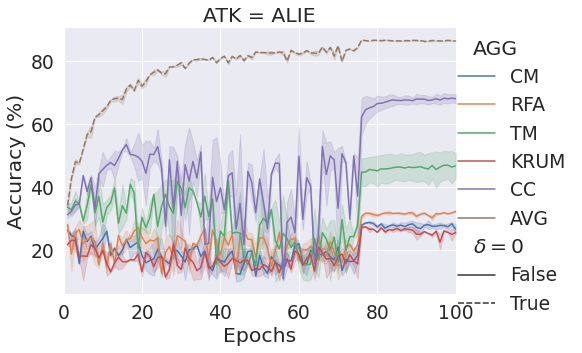

In [18]:
sns.set(font_scale=1.7)
g = sns.relplot(
    data=df2,
    x="Epochs", y="Accuracy (%)", 
    col="ATK",
    hue="AGG",
    style=r"$\delta=0$",
    height=5, aspect=1.3,
    # legend=False,
    # ci=None,
    kind="line"
)
g.set(xlim=(0, 100))


In [19]:
g.fig.savefig("/home/lhe/Projects/2020-2021/momentum-robustness/report/figures/history-demo.pdf", bbox_inches = "tight")

In [20]:
import seaborn as sns
import json
import pandas as pd
import numpy as np

# Load results
ROOT_PATH="../outputs/cifar10-CC-HP-explore/f5_{atk}_tau{tau}_l{l}_seed{s}/stats"

def read_json(path):
    print("read_json", path)
    validation = []
    with open(path, "r") as f:
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'validation':
                validation.append(data)
    return validation

# Loop over hyperparameters
data_collection = {}
for seed in [0, 1, 2]: 
    for attack in [ "BF", "LF"]:
        for tau in [0.1, 10.0, 1000.0]:
            for l in [1, 3, 5]:
                try:
                    path = ROOT_PATH.format(atk=attack, tau=tau, l=l, s=seed)
                    data_collection[path] = read_json(path)
                except Exception as e:
                    print(e)
                    raise 

def transform(entry, atk, tau, l, s):
    # {'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887, 'top1': 17.8986}
    return {
        'Epochs': entry['E'],
        'Accuracy (%)': entry['top1'],
        'ATK': atk,
        r'$\tau$': str(tau),
        "#Clipping Iterations": l,
        'seed': s,
    }

df = []
for seed in [0, 1, 2]: 
    for attack in [ "BF", "LF"]:
        for tau in [0.1, 10.0, 1000.0]:
            for l in [1, 3, 5]:
                try:
                    path = ROOT_PATH.format(atk=attack, tau=tau, l=l, s=seed)
                    validation_entries = data_collection[path]
                    df += list(map(lambda x: transform(x, atk=attack, tau=tau, l=l, s=seed), validation_entries))
                except Exception as e:
                    print("Error", e)
                    raise

df = pd.DataFrame(df)

read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau0.1_l1_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau0.1_l3_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau0.1_l5_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau10.0_l1_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau10.0_l3_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau10.0_l5_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau1000.0_l1_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau1000.0_l3_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_BF_tau1000.0_l5_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_LF_tau0.1_l1_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_LF_tau0.1_l3_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_LF_tau0.1_l5_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_LF_tau10.0_l1_seed0/stats
read_json ../outputs/cifar10-CC-HP-explore/f5_LF_tau10.0_l3_seed

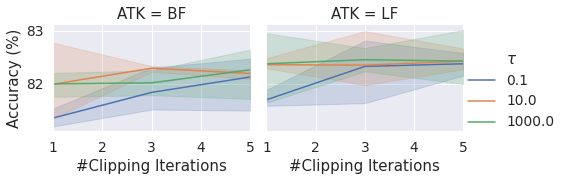

In [21]:
sns.set(font_scale=1.25)
g = sns.relplot(
    data=df[df["Epochs"]==100],
    x="#Clipping Iterations", y="Accuracy (%)", 
    col="ATK", 
    hue=r"$\tau$", #style=r"$\delta=0$",
    height=2.5, aspect=1.3,
    # legend=False,
    # ci=None,
    kind="line"
)
g.set(xlim=(1, 5))


In [22]:
g.fig.savefig("/home/lhe/Projects/2020-2021/momentum-robustness/report/figures/exp2_final.pdf", bbox_inches = "tight")